In [20]:
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from plotnine import *
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

%matplotlib inline

In [21]:
bk = pd.read_csv('nut.csv', sep='\t')
bk.head()

,Item,Serving.size,Calories,Fat.Cal,Protein(g),Fat(g),Sat.Fat(g),Trans.fat(g),Chol(mg),Sodium(mg),Carbs(g),Fiber(g),Sugar(g),Meat,Breakfast,Not Breakfast,CarbsxMeat
0,Hamburger,109.0,260,90.0,13,10.0,4.0,0.0,35,490,28,1.0,6,1,0,1,28
1,Cheeseburger,121.0,300,130.0,16,14.0,6.0,0.0,45,710,28,1.0,6,1,0,1,28
2,Double_Hamburger,146.0,360,160.0,22,18.0,8.0,0.0,70,520,28,1.0,6,1,0,1,28
3,Double_Cheeseburger,171.0,450,230.0,26,26.0,12.0,1.0,95,960,29,1.0,6,1,0,1,29
4,Buck_Double,158.0,410,200.0,24,22.0,10.0,0.5,85,740,28,1.0,6,1,0,1,28


SILHOUTTE :  0.33332840745050135


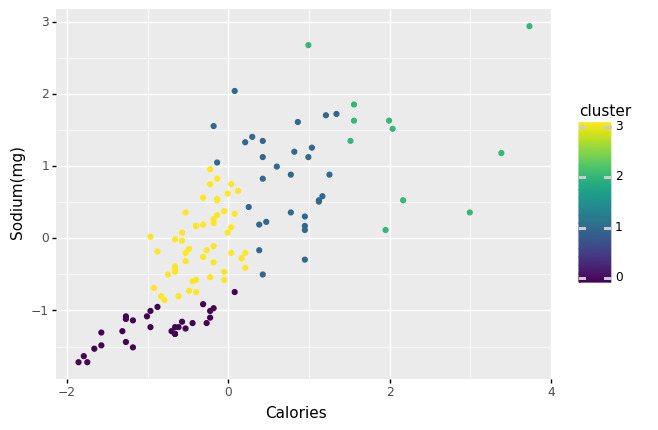

<ggplot: (105971687557)>

In [22]:
features = ['Calories', 'Sodium(mg)']
X = bk[features]
z = StandardScaler()
X[features] = z.fit_transform(X)
EM = GaussianMixture(n_components=4)
EM.fit(X)
cluster = EM.predict(X)
print('SILHOUTTE : ', silhouette_score(X, cluster))
X['cluster']=cluster
(ggplot(X, aes(x= "Calories", y = 'Sodium(mg)', color='cluster')) + geom_point())


Multiple Dimension

In [23]:
features = ['Sugar(g)','Protein(g)','Fat(g)']
X=bk[features]
z=StandardScaler()
X[features]=z.fit_transform(X)


In [24]:
EM = GaussianMixture(n_components=3)
EM.fit(X)
cluster=EM.predict(X)
print('sihoutte score : ', silhouette_score(X, cluster))
X['cluster']=cluster

sihoutte score :  0.41269446652563374


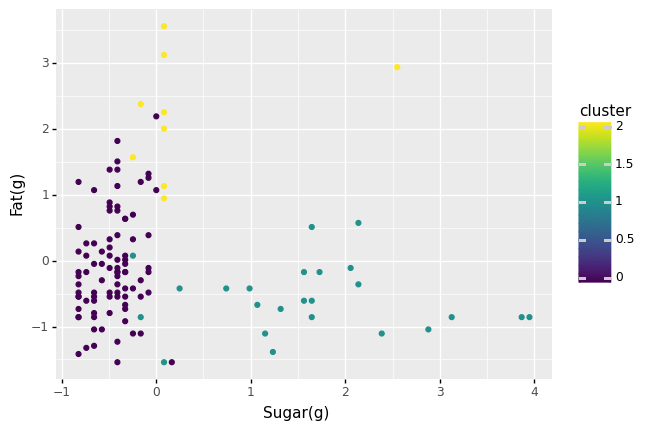

<ggplot: (105971719512)>

In [25]:
(ggplot(X, aes(x= "Sugar(g)", y = 'Fat(g)', color='cluster')) + geom_point())

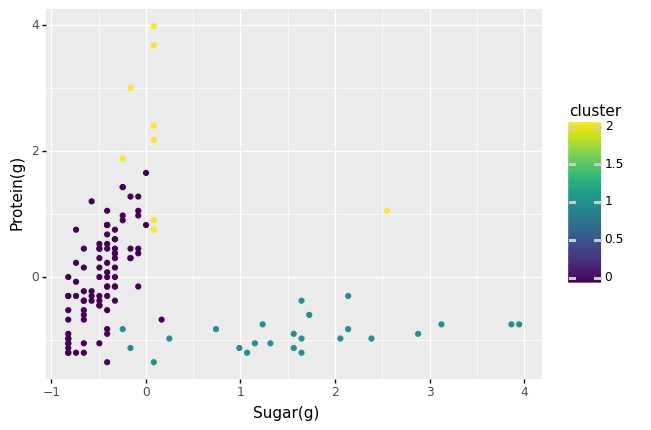

<ggplot: (105972002039)>

In [26]:
(ggplot(X, aes(x= "Sugar(g)", y = 'Protein(g)', color='cluster')) + geom_point())

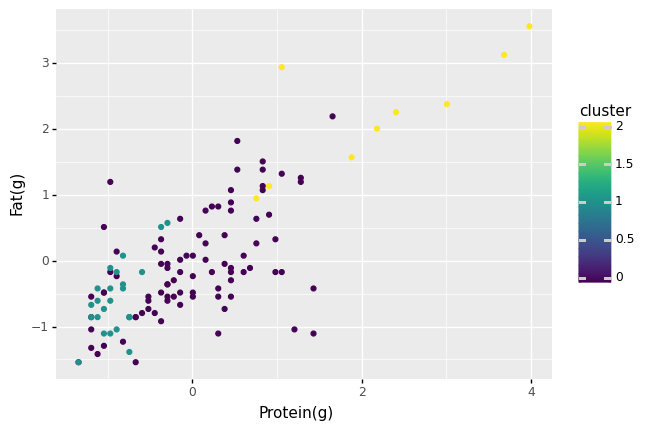

<ggplot: (105972010439)>

In [27]:
(ggplot(X, aes(x= "Protein(g)", y = 'Fat(g)', color='cluster')) + geom_point())